# ANOVA  (testeo de mas de dos muestras)

In [1]:
import pandas as pd
from scipy import stats

In [2]:
# ejemplo plantas

df=pd.read_csv('data/PlantGrowth.csv')
df.head()

,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


In [3]:
df.group.unique()

array(['ctrl', 'trt1', 'trt2'], dtype=object)

In [4]:
df_anova=df[['weight','group']]

grupos=df.group.unique()

In [5]:
data={g:df_anova.weight[df_anova.group==g] for g in grupos}
data

{'ctrl': 0    4.17
 1    5.58
 2    5.18
 3    6.11
 4    4.50
 5    4.61
 6    5.17
 7    4.53
 8    5.33
 9    5.14
 Name: weight, dtype: float64, 'trt1': 10    4.81
 11    4.17
 12    4.41
 13    3.59
 14    5.87
 15    3.83
 16    6.03
 17    4.89
 18    4.32
 19    4.69
 Name: weight, dtype: float64, 'trt2': 20    6.31
 21    5.12
 22    5.54
 23    5.50
 24    5.37
 25    5.29
 26    4.92
 27    6.15
 28    5.80
 29    5.26
 Name: weight, dtype: float64}

In [6]:
f_score, p_value=stats.f_oneway(data['ctrl'], data['trt1'], data['trt2'])
print (f_score, p_value)

4.846087862380136 0.0159099583256229


In [7]:
# ejemplo ciudades

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f

In [8]:
rate=pd.read_csv('data/rate_by_city.csv')
rate.head()

,Rate,City
0,13.75,1
1,13.75,1
2,13.50,1
3,13.50,1
4,13.00,1


In [9]:
rate.City.unique()

array([1, 2, 3, 4, 5, 6])

In [10]:
rate['city_count']=rate.groupby('City').cumcount()
rate_pivot=rate.pivot(columns='City', values='Rate', index='city_count')
rate_pivot

City,1,2,3,4,5,6
city_count,,,,,,
0,13.75,14.25,14.00,15.00,14.50,13.50
1,13.75,13.00,14.00,14.00,14.00,12.25
2,13.50,12.75,13.51,13.75,14.00,12.25
3,13.50,12.50,13.50,13.59,13.90,12.00
4,13.00,12.50,13.50,13.25,13.75,12.00
5,13.00,12.40,13.25,12.97,13.25,12.00
6,13.00,12.30,13.00,12.50,13.00,12.00
7,12.75,11.90,12.50,12.25,12.50,11.90
8,12.50,11.90,12.50,11.89,12.45,11.90


In [11]:
f_oneway(*[rate_pivot[i] for i in range(1, 7)])

F_onewayResult(statistic=4.8293848737024, pvalue=0.001174551414504048)

In [12]:
rate.describe()

,Rate,City,city_count
count,54.000000,54.000000,54.000000
mean,13.006667,3.500000,4.000000
std,0.785527,1.723861,2.606233
min,11.890000,1.000000,0.000000
25%,12.412500,2.000000,2.000000
50%,13.000000,3.500000,4.000000
75%,13.570000,5.000000,6.000000
max,15.000000,6.000000,8.000000


In [13]:
# F-test a mano

data=np.array([[1,2,3], [4,5,6], [7,8,9]]).T
data

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [14]:
m=data.shape[1]
n=data.shape[0]

media=data.mean()

col_medias=data.mean(axis=0)

s_c_entre_grupos=(((col_medias-media)**2)*n).sum()
dof_sceg=m-1

s_c_grupo=((data-col_medias)**2).sum()
dof_scg=m*(n-1)

f_score=(s_c_entre_grupos/dof_sceg)/(s_c_grupo/dof_scg)
f_score

27.0

In [15]:
f_oneway(data[:, 0], data[:, 1], data[:, 2])

F_onewayResult(statistic=27.0, pvalue=0.0010000000000000002)

In [17]:
# con statsmodels

formula='Rate ~ C(City)'

modelo=ols(formula=formula, data=rate).fit()

anova_table=sm.stats.anova_lm(modelo, typ=1)

anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(City),5.0,10.945667,2.189133,4.829385,0.001175
Residual,48.0,21.758133,0.453294,NaN,NaN


In [18]:
# two-way

df=pd.read_csv('data/crop_yield.csv')
df.head()

,Fert,Water,Yield
0,A,High,27.4
1,A,High,33.6
2,A,High,29.8
3,A,High,35.2
4,A,High,33.0


In [19]:
df.Fert.unique()

array(['A', 'B'], dtype=object)

In [20]:
df.Water.unique()

array(['High', 'Low'], dtype=object)

In [27]:
modelo=ols('Yield ~ C(Fert)*C(Water)', df).fit()
modelo.fvalue
modelo.f_pvalue

0.024302580837416664

In [28]:
res=sm.stats.anova_lm(modelo, typ=2)
res

,sum_sq,df,F,PR(>F)
C(Fert),69.192,1.0,5.766000,0.028847
C(Water),63.368,1.0,5.280667,0.035386
C(Fert):C(Water),15.488,1.0,1.290667,0.272656
Residual,192.000,16.0,NaN,NaN


# MANOVA  (ANOVA multivariante)

In [29]:
from statsmodels.multivariate.manova import MANOVA

In [30]:
df=pd.read_csv('data/iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [31]:
df.variety.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [32]:
df.columns=df.columns.str.replace('.', '_')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [36]:
manova=MANOVA.from_formula('sepal_length+sepal_width+petal_length+petal_width ~ variety', data=df)
print (manova.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0170 4.0000 144.0000 2086.7720 0.0000
         Pillai's trace  0.9830 4.0000 144.0000 2086.7720 0.0000
 Hotelling-Lawley trace 57.9659 4.0000 144.0000 2086.7720 0.0000
    Roy's greatest root 57.9659 4.0000 144.0000 2086.7720 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
        variety          Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0234 8.0000 288.0000  199.1453 0.0000
         Pillai's trace  1.1919 8.0000 290.00

In [42]:
# ji-dos (chi-cuadrado) para una poblacion que tenga dos variables categoricas
# ¿Existe asociacion significativa entre las dos? (H0: NO, H1: SI)

import scipy

df=pd.read_csv('data/chi-test.csv')
df.head()

,Gender,Like Shopping?
0,Male,No
1,Female,Yes
2,Male,Yes
3,Female,Yes
4,Female,Yes


In [46]:
df.shape

(9, 2)

In [43]:
contin_table=pd.crosstab(df.Gender, df['Like Shopping?'])
contin_table

Like Shopping?,No,Yes
Gender,,
Female,2,3
Male,2,2


In [44]:
chi2, pval, dof, ex = scipy.stats.chi2_contingency(contin_table)
pval

0.7076604666545525

In [47]:
# a mano

from scipy.stats import chi2

chi_square=([(f-e)**2./e for f,e in zip(contin_table.values, ex)])

chi_statistic=sum(chi_square)

p_value=1-chi2.cdf(x=chi_statistic, df=dof)
p_value

array([0.82306327, 0.84148058])

# Regresion Lineal

In [48]:
from scipy.stats import linregress

In [49]:
auto=pd.read_csv('data/auto-mpg.csv')
auto.head()

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""


In [50]:
linreg=linregress(auto.acceleration, auto.mpg)
linreg

LinregressResult(slope=1.1912045293502274, intercept=4.9697930042539085, rvalue=0.4202889121016507, pvalue=1.8230915350787203e-18, stderr=0.12923643283101396)

In [53]:
R2=linreg[2]**2
R2

0.17664276963558906

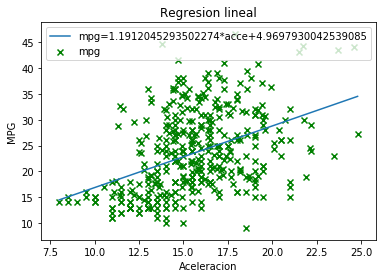

In [54]:
# plot
x=np.linspace(auto.acceleration.min(), auto.acceleration.max(), 50)
y=linreg[1]+linreg[0]*x
plt.plot(x, y, label='mpg={}*acce+{}'.format(linreg[0], linreg[1]))
plt.scatter(auto.acceleration, auto.mpg, marker='x', c='g', label='mpg')
plt.title('Regresion lineal')
plt.xlabel('Aceleracion')
plt.ylabel('MPG')
plt.legend()
plt.show();

In [55]:
# linreg con statsmodels

x=sm.add_constant(auto.acceleration)
y=auto.mpg

modelo=sm.OLS(y, x).fit()

pred=modelo.predict(x)

modelo.summary()

/Users/data/Library/Python/3.7/lib/python/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     84.96
Date:                Thu, 06 Feb 2020   Prob (F-statistic):           1.82e-18
Time:                        12:44:28   Log-Likelihood:                -1343.9
No. Observations:                 398   AIC:                             2692.
Df Residuals:                     396   BIC:                             2700.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.9698      2.043      2.432      0.015       0.953       8.987
acceleration     1.1912      0.129      9.217      0.000       0.937       1.445
==============================================================================
Omnibus:                       17.459   Durbin-Watson:                   0.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.214
Skew:                           0.497   Prob(JB):                     0.000111
Kurtosis:                       2.670   Cond. No.                         91.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# varias variables

x=sm.add_constant(auto[[
    #'acceleration',
   # 'cylinders',
    'weight',
   # 'horse_power',
    'model_year',
   # 'displacement'
]].apply(lambda x: x.fillna(x.mean()))

)

y=auto.mpg


modelo=sm.OLS(y, x).fit()

pred=modelo.predict(x)

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     830.4
Date:                Thu, 06 Feb 2020   Prob (F-statistic):          3.26e-142
Time:                        12:49:40   Log-Likelihood:                -1054.3
No. Observations:                 398   AIC:                             2115.
Df Residuals:                     395   BIC:                             2127.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.1980      3.968     -3.578      0.000     -21.998      -6.398
weight        -0.0067      0.000    -31.161      0.000      -0.007      -0.006
model_year     0.7566      0.049     15.447      0.000       0.660       0.853
==============================================================================
Omnibus:                       41.827   Durbin-Watson:                   1.216
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.734
Skew:                           0.665   Prob(JB):                     1.19e-15
Kurtosis:                       4.541   Cond. No.                     7.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
# version scikit-learn
!pip3 install scikit-learn

In [61]:
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.metrics import r2_score

In [63]:
auto=auto.dropna()

In [73]:
x=auto[[
    'acceleration',
    'cylinders',
    'weight',
    'horse_power',
    'model_year',
    'displacement'
]]


y=auto.mpg

modelo=LinReg(fit_intercept=True)
modelo.fit(x, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
y_pred=modelo.predict(x)
r2_score(y, y_pred)

0.8092552890383932

In [75]:
modelo.coef_

array([ 8.52732469e-02, -3.29859089e-01, -6.79461791e-03, -3.91355574e-04,
        7.53367180e-01,  7.67843024e-03])

In [76]:
modelo.intercept_

-14.535250480506473